In [1]:
print("Posh")

Posh


# Mini ML Project For Linear Regression and RandomForest

In [2]:
# Dataset is avalable on my dataset repository...access it from their for future use 
import pandas as pd 
df = pd.read_csv("/Users/manansharma/Desktop/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Info about the dataset imported

* When you import a dataset and access it then it shows its index number , column names and their values , number of (rows x columns).
<br>
* Columns - MolLogP, MolWt, NumRotatableBonds, AromaticProportion,logS
<br>
* Here logS will be the 'y' variable which means it is the one which we have to predict. 
<br>
* y = f(x) [ y is the variable that needs to predicted and x are all other variables in the dataset which will help in prediction process]

## Data Preparation

### Data seperation as x and y

In [3]:
# Storing value of logS in y variable.
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
# Storing the values of remaing columns in X completing our data seperation process
# axis = 1 will help the drop function to work with the data in column mode.
X = df.drop("logS", axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting into training and testing

* In the below cell we will split data 80:20 to train and test datasets
<br>
* After running the below code 4 new variables will be created (X_train , X_test , y_train , y_test) which we can use to train and test the model
<br> 
* test_size = 0.2 makes the size of the testing data as 20% of the entire dataset 
<br>
* random_state = 100 ensures that data is split in the same way every time we run the code. If not set then everytime u run the code, the shuffeling will be random as it will not have a fixed seed

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size= 0.2, random_state=100)

In [6]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [7]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [8]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [9]:
y_test 

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

## Model Building 

### Linear Regression

* Training the model to make prediction. We use fit function to train the model we made on training dataset. Observe the following code -

In [10]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

* Applying the model to make prediction 

In [11]:
y_lr_train_pred = lr.predict(X_train) 
y_lr_test_pred = lr.predict(X_test)

* <b>y_lr_train_pred</b> contains prediction values for training data. Here prediction is happening on the data it has been trained on which helps us evaluate how well the model has fitted the data it has been given before. This helps us in evaluating the performance of the algorythm.
<br>
<br>
* <b>y_lr_test_pred</b> contains prediction values for testing data. Here we use the trained linear regression model to predict values for data that it has not seen till now. This helps us evalute how generalized the model is to unseen data.

In [12]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [13]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Model Performance

* We find out the model performance by compairing the predicted values with the actual values
<br>
<br>
* Now <b>y_lr_train_pred</b> contains predictions for trained data and <b>y_lr_test_pred</b> contained predictions for test data aka data that it has not seen before. 
<br>
<br>
* Now we can use matrices such as meanSquaredError and R-squared value to analyse the model performance
<br>
<br>
* <b>MeanSquaredError(MSE) -</b> Mean Squared error is a metric that quantifies the average squared difference between the actual target values and the predicted values from a model. It penalizes large errors more than smaller once making it sensitive to outliers. A lower MSE indicates a better model fit. MSE ranges from 0 to infinity, with 0 being a perfect fit. 
<br>
<br>
* <b>R-squared value(R^2) -</b> R-squared value is a metric that represents the proportion of variance in the target variable explained by the model. It indicates how well the model fits the data, with values closer to 1 representing a better fit. An r-squared value of 0 represents that the model is explaining none of the variance while 1 means it explains it all. Its value can also be negative if it performs worse than a simple horizontal line aka the mean of the target variable

In [14]:
from sklearn.metrics import mean_squared_error , r2_score 

# Mean Squared error 
lr_mse_train = mean_squared_error(y_train ,y_lr_train_pred )
lr_mse_test = mean_squared_error(y_test , y_lr_test_pred)

# r-squared value
lr_r2_train = r2_score(y_train , y_lr_train_pred) 
lr_r2_test = r2_score(y_test , y_lr_test_pred)

In [15]:
lr_mse_train

1.0075362951093687

In [16]:
lr_r2_train

0.7645051774663391

In [17]:
lr_mse_test

1.0206953660861033

In [18]:
lr_r2_test

0.7891616188563282

In [19]:
# We can print all 4 of the above outputs in one code cell to make it look clean
print("MSE for Training Data - ", lr_mse_train)
print("R2 score for Training Data -", lr_r2_train)
print("MSE for Testing Data -", lr_mse_test)
print("R2 score for Testing Data ", lr_r2_test)

MSE for Training Data -  1.0075362951093687
R2 score for Training Data - 0.7645051774663391
MSE for Testing Data - 1.0206953660861033
R2 score for Testing Data  0.7891616188563282


In [20]:
# Now for making these outputs look more symmetrical we can even create a dataframe and add values there-
results_lr = pd.DataFrame(["Linear Regression", lr_mse_train , lr_r2_train , lr_mse_test, lr_r2_test]).transpose()
results_lr

,0,1,2,3,4
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


In [21]:
# Adding column names 
results_lr.columns = ["model_name" , "MSE on train data" , "R2 on train data" , "MSE on test data" , "R2 on test data"]
results_lr

,model_name,MSE on train data,R2 on train data,MSE on test data,R2 on test data
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


* The above output is the output for prediction made using a linear regression model. Now lets do the same with the random forest model and compair the accuracies of both the models 

### **Random Forest Model**

#### Training the model using the random forest algorythm

* Note that in the dataset we have logS as the 'y' value which is quantitative in nature. If the y value is quantitative then we use regressor model and if y variable is categorical then we build a classification model.
<br>
<br>
* As in this case logS is quantitative hence we will use regressor model and hence we use RandomForestRegressor model and not RandomForestClassifier. 

In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 2 , random_state = 100)
rfr.fit(X_train , y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**RandomForestRegressor(max_depth = 2 , random_state = 100)**
<br>
<br>
* **max_depth -** It specifies the maximum depth of each tree in the randomforest algorythm. In short it limits how deep each tree can grow. Tree Depth refers to the number of decision nodes from the root node of the tree to the leaf(final decision). A smaller max_depth value limits the complexity of the trees preventing overfitting making the model simpler
<br>
<br>
* **random_state -** Setting random state ensures that the model behavior is reproducible. Each time u run the code with the same random state u will get the same result. It helps in debugging and compairing models because the randomness is controlled. Setting it to 100 ensures randomness is controlled and repeatable. 

#### Making Predictions using RandomForestRegressor

In [23]:
y_rfr_train_pred = rfr.predict(X_train) # Predicting on data it has already been trained on 
y_rfr_test_pred = rfr.predict(X_test) # Predicting on new data it has never seen 

In [24]:
y_rfr_train_pred

array([-4.44388581, -1.40132433, -1.41481453, -1.41481453, -1.44411435,
       -2.67492782, -2.50755276, -3.95611327, -4.62529592, -2.27343298,
       -2.69241199, -4.5150244 , -1.41481453, -2.67492782, -7.14501987,
       -2.30422396, -4.0676017 , -3.36086239, -2.53282364, -4.5150244 ,
       -2.47178242, -4.0676017 , -2.66143763, -1.42912192, -1.2164651 ,
       -7.14501987, -2.67492782, -2.47178242, -7.14501987, -1.2164651 ,
       -4.5150244 , -1.2164651 , -7.14501987, -1.41481453, -1.64246378,
       -4.5150244 , -4.5150244 , -1.41481453, -2.71012897, -1.64246378,
       -2.42959807, -2.89446137, -2.47178242, -1.24495146, -2.69241199,
       -1.2164651 , -1.2164651 , -4.65157679, -2.6279475 , -1.2164651 ,
       -1.79134844, -4.5150244 , -1.2164651 , -4.44388581, -4.62529592,
       -4.0676017 , -4.5150244 , -2.66143763, -1.41481453, -4.0676017 ,
       -2.67492782, -1.40132433, -3.32568382, -2.51725697, -4.44388581,
       -7.14501987, -7.14501987, -1.44411435, -4.5150244 , -1.42

In [25]:
y_rfr_test_pred

array([-3.97313718, -7.14501987, -2.47178242, -2.40196468, -1.44411435,
       -1.40132433, -1.2164651 , -1.41481453, -7.14501987, -4.5150244 ,
       -4.5150244 , -2.27343298, -1.83979246, -1.24495146, -4.5150244 ,
       -1.40132433, -1.24495146, -2.67492782, -2.67492782, -4.65157679,
       -3.00915981, -4.62529592, -7.12312525, -2.47657839, -4.5150244 ,
       -4.5150244 , -4.5150244 , -4.5150244 , -4.44388581, -1.2164651 ,
       -1.41481453, -2.67492782, -2.67492782, -1.42961706, -1.40132433,
       -2.27343298, -2.0381419 , -2.67492782, -4.5150244 , -1.38740573,
       -1.2164651 , -1.61447629, -7.14501987, -7.14501987, -7.12312525,
       -4.42408609, -2.0381419 , -1.41481453, -1.41481453, -2.50541484,
       -1.83979246, -4.5150244 , -1.2164651 , -2.6279475 , -4.62529592,
       -1.42912192, -7.14501987, -1.2164651 , -1.41481453, -4.62529592,
       -1.62796649, -2.69241199, -2.67492782, -2.66143763, -1.2164651 ,
       -1.23077249, -2.67492782, -4.00999869, -1.41481453, -4.21

#### Model Performance Evaluation for Random Forest 

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
rfr_mse_train = mean_squared_error(y_train ,y_rfr_train_pred)
rfr_mse_test = mean_squared_error(y_test , y_rfr_test_pred)
# R-squared values 
rfr_r2_train = r2_score(y_train , y_rfr_train_pred)
rfr_r2_test = r2_score(y_test , y_rfr_test_pred)

In [27]:
print("MSE for Training Data-" , rfr_mse_train)
print("R2 score for Training Data-", rfr_r2_train)
print("MSE for Testing Data-", rfr_mse_test)
print("R2 score for Testing Data-", rfr_r2_test)

MSE for Training Data- 1.028227802112806
R2 score for Training Data- 0.7596688824431413
MSE for Testing Data- 1.407688264904896
R2 score for Testing Data- 0.7092230211002489


In [28]:
# Creating Dataframe for the results 
results_rfr = pd.DataFrame(["RandomForestRegressor", rfr_mse_train , rfr_r2_train , rfr_mse_test, rfr_r2_test]).transpose()
results_rfr.columns = (["model_name" , "MSE on train data" , "R2 on train data" , "MSE on test data" , "R2 on test data"])
results_rfr

,model_name,MSE on train data,R2 on train data,MSE on test data,R2 on test data
0,RandomForestRegressor,1.028228,0.759669,1.407688,0.709223


* Now we have two tables which tell us the accuracies of different ML models in the same data
* Now lets combine them into one table

## Model Comparision Table

In [29]:
model_performance_comparision = pd.concat([results_lr,results_rfr] , axis = 0)
model_performance_comparision 

,model_name,MSE on train data,R2 on train data,MSE on test data,R2 on test data
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,RandomForestRegressor,1.028228,0.759669,1.407688,0.709223


In [30]:
# As you can see after concatenation of both tables the index numbers are wrongly depected. 
# For solving this we will simply reset the index numbers for the new table 
# drop = True in reset_index drops the label index in the table. Did it as it looks more clean
model_performance_comparision.reset_index(drop = True)

,model_name,MSE on train data,R2 on train data,MSE on test data,R2 on test data
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,RandomForestRegressor,1.028228,0.759669,1.407688,0.709223


## Data Visualization

* Within data visualization we are going to take the predicted values and actual values and make a scatter plot

[]

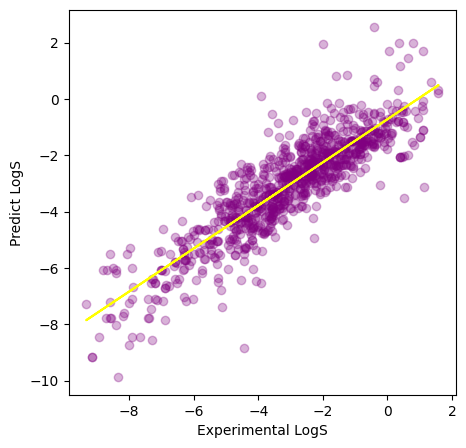

In [31]:
import matplotlib.pyplot as plt 
import numpy as np 

# Making Scatter Plot
plt.figure(figsize= (5,5))
plt.scatter(x = y_train , y= y_lr_train_pred , alpha = 0.3, c = "purple")
plt.xlabel("Experimental LogS")
plt.ylabel("Predict LogS")

# adding trendline
z = np.polyfit(y_train , y_lr_train_pred , 1)
p = np.poly1d(z)
plt.plot(y_train , p(y_train), "yellow")

plt.plot()

* We have constructed a scatter plot where x axis represents the actual values(y_train) and y represents the predicted values by the linear regression model(y_lr_train_pred). 
* The alpha attribute makes the points semi-transparent and we have assigned purple color for the datapoints
* polyfit is used for fitting the first degree polynomial to the data which is known as the trendline. 
* The line gets plotted over the scatter plot with yellow color. 